In [19]:
from nnsight import LanguageModel
import torch
import pickle
import more_itertools

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import umap

import matplotlib.pyplot as plt


In [20]:
model = LanguageModel('gpt2', device_map='cpu')

with open('data/emotion_wheel_SSKO.pkl', 'rb') as f:
    SSKO, color, level = pickle.load(f)
emotion_word_list = list(more_itertools.collapse(SSKO))
color_list = list(more_itertools.collapse(color))
level_list = list(more_itertools.collapse(level))


/Users/bozhao/anaconda3/envs/ntt5/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1602: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [21]:
print(model)
print(len(emotion_word_list), len(color_list), len(level_list))
print(emotion_word_list[0:10])

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2SdpaAttention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
  (generator): WrapperModule()
)
141 141 141
['love', 'joy', 'surprise', 'anger', 'sadness', 'fear', 'adoratio

In [29]:
def plot_PCA(filename, logits_list, color_list, level_list, annotate=False):
    logits_np = logits_list.detach().cpu().numpy()
    scaler = StandardScaler()
    logits_np_normalized = scaler.fit_transform(logits_np)
    pca = PCA(n_components=2)
    transformed_data = pca.fit_transform(logits_np_normalized)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(transformed_data[:, 0], transformed_data[:, 1], alpha=0.7, color=color_list[:163], s=level_list)
    plt.xlabel('Principal Component 1', fontsize=20)
    plt.ylabel('Principal Component 2', fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    # plt.grid(True)

    if annotate:
        for i, label in enumerate(emotion_word_list):
            if i < 6: # 6 primary emotions only
                plt.annotate(label, (transformed_data[i, 0], transformed_data[i, 1]),
                             textcoords="offset points", xytext=(0,8), ha='center')
        
    plt.savefig(filename, bbox_inches='tight')

def plot_tSNE(filename, logits_list, color_list, level_list, annotate=False):
    logits_np = logits_list.detach().cpu().numpy()
    scaler = StandardScaler()
    logits_np_normalized = scaler.fit_transform(logits_np)
    tsne = TSNE(n_components=2, random_state=42)
    transformed_data = tsne.fit_transform(logits_np_normalized)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(transformed_data[:, 0], transformed_data[:, 1], alpha=0.7, color=color_list[:163], s=level_list)
    plt.xlabel('t-SNE Feature 1', fontsize=20)
    plt.ylabel('t-SNE Feature 2', fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    
    if annotate:
        for i, label in enumerate(emotion_word_list):
            if i < 6: # 6 primary emotions only
                plt.annotate(label, (transformed_data[i, 0], transformed_data[i, 1]),
                             textcoords="offset points", xytext=(0,8), ha='center')
    plt.savefig(filename, bbox_inches='tight')

def plot_UMAP(filename, logits_list, color_list, level_list, annotate=False):
    logits_np = logits_list.detach().cpu().numpy()
    scaler = StandardScaler()
    logits_np_normalized = scaler.fit_transform(logits_np)
    umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
    transformed_data = umap_reducer.fit_transform(logits_np_normalized)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(transformed_data[:, 0], transformed_data[:, 1], alpha=0.7, color=color_list[:163], s=level_list)
    plt.xlabel('UMAP Dimension 1', fontsize=20)
    plt.ylabel('UMAP Dimension 2', fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    
    if annotate:
        for i, label in enumerate(emotion_word_list):
            if i < 6: # 6 primary emotions only
                plt.annotate(label, (transformed_data[i, 0], transformed_data[i, 1]),
                             textcoords="offset points", xytext=(0,8), ha='center')

    plt.savefig(filename, bbox_inches='tight')

torch.Size([141, 768])


/Users/bozhao/anaconda3/envs/ntt5/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


torch.Size([141, 768])


/Users/bozhao/anaconda3/envs/ntt5/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


torch.Size([141, 768])


/Users/bozhao/anaconda3/envs/ntt5/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


torch.Size([141, 768])


/Users/bozhao/anaconda3/envs/ntt5/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


torch.Size([141, 768])


/Users/bozhao/anaconda3/envs/ntt5/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


torch.Size([141, 768])


/Users/bozhao/anaconda3/envs/ntt5/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


torch.Size([141, 768])


/Users/bozhao/anaconda3/envs/ntt5/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/var/folders/8p/c9kgv3hd0zlbvsvzb6f644q00000gp/T/ipykernel_18728/839936402.py:52: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 6))


torch.Size([141, 768])


/Users/bozhao/anaconda3/envs/ntt5/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


torch.Size([141, 768])


/Users/bozhao/anaconda3/envs/ntt5/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


torch.Size([141, 768])


/Users/bozhao/anaconda3/envs/ntt5/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


torch.Size([141, 768])


/Users/bozhao/anaconda3/envs/ntt5/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


torch.Size([141, 768])


/Users/bozhao/anaconda3/envs/ntt5/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


torch.Size([141, 50257])


/Users/bozhao/anaconda3/envs/ntt5/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


torch.Size([141, 768])


/Users/bozhao/anaconda3/envs/ntt5/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


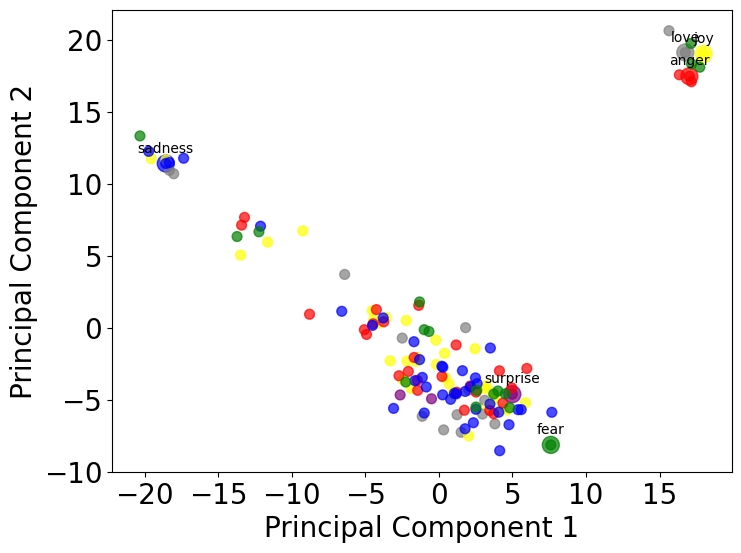

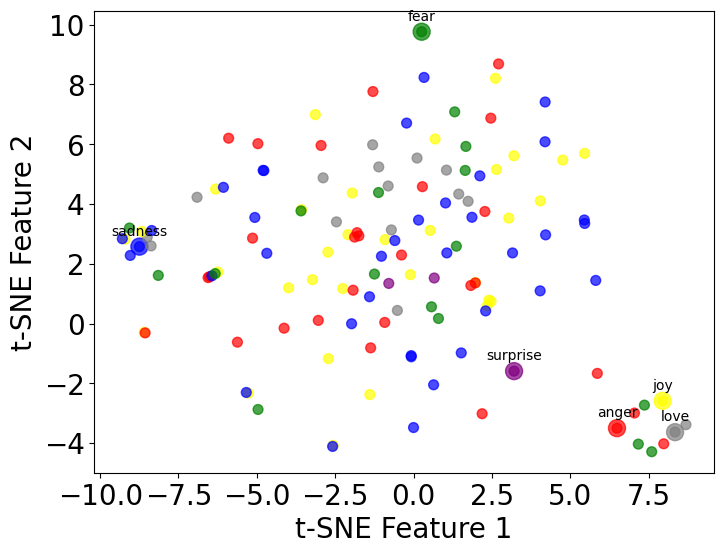

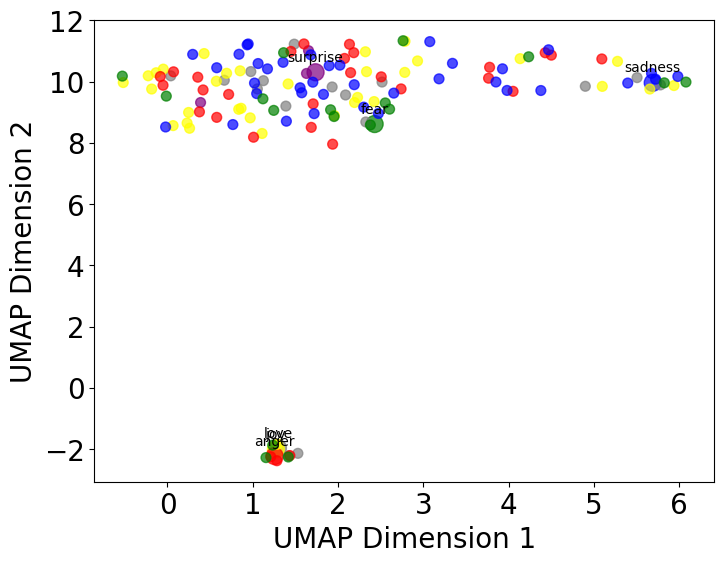

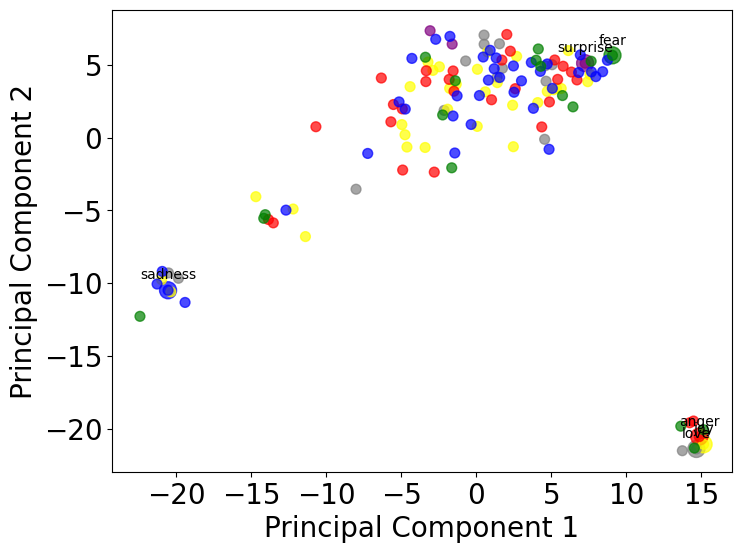

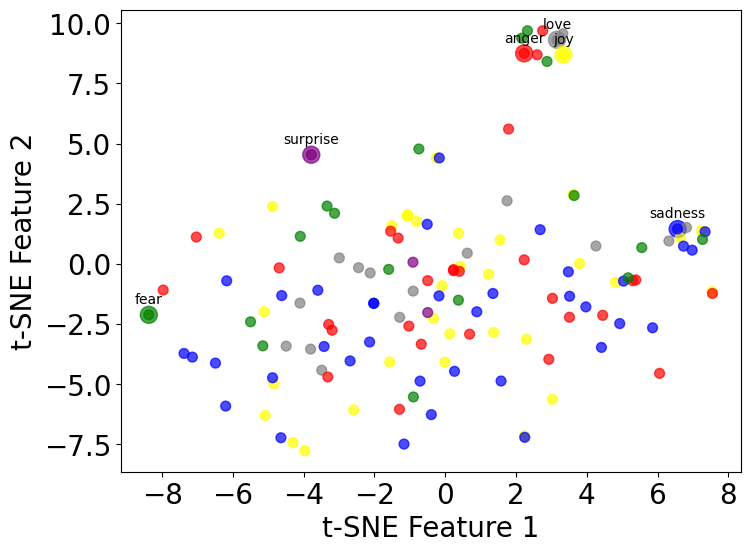

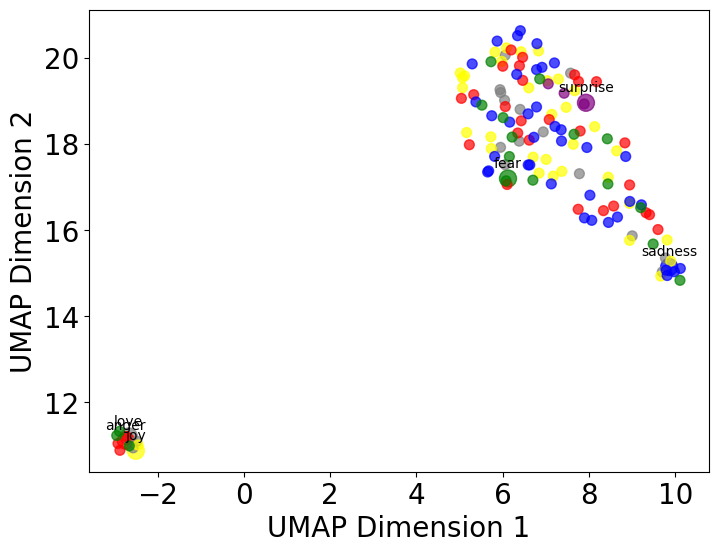

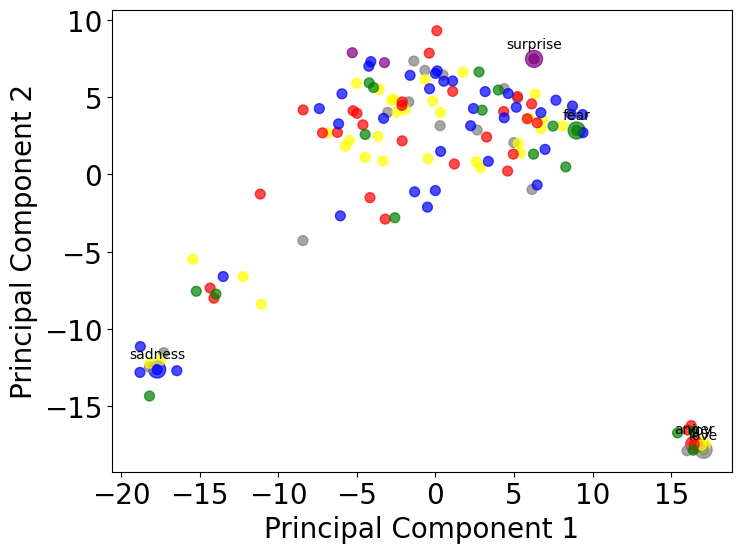

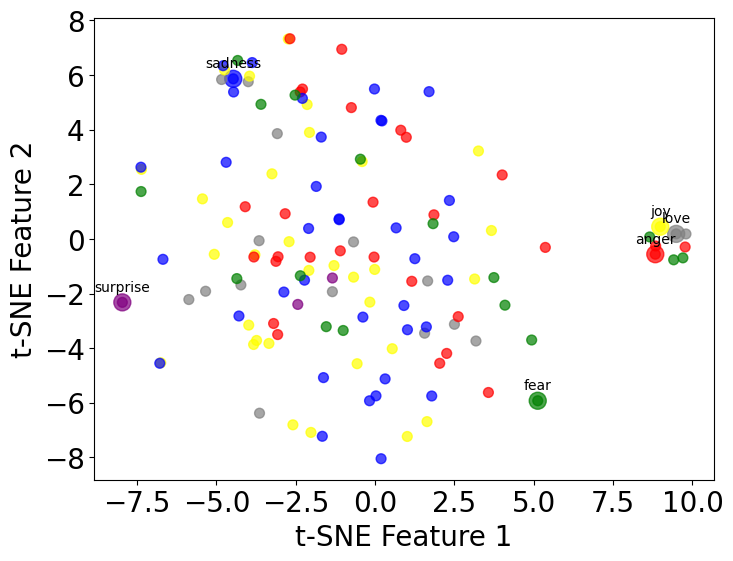

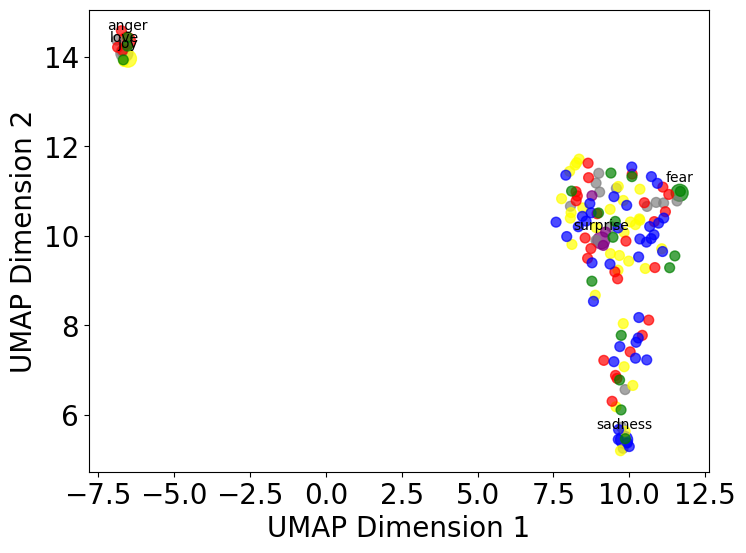

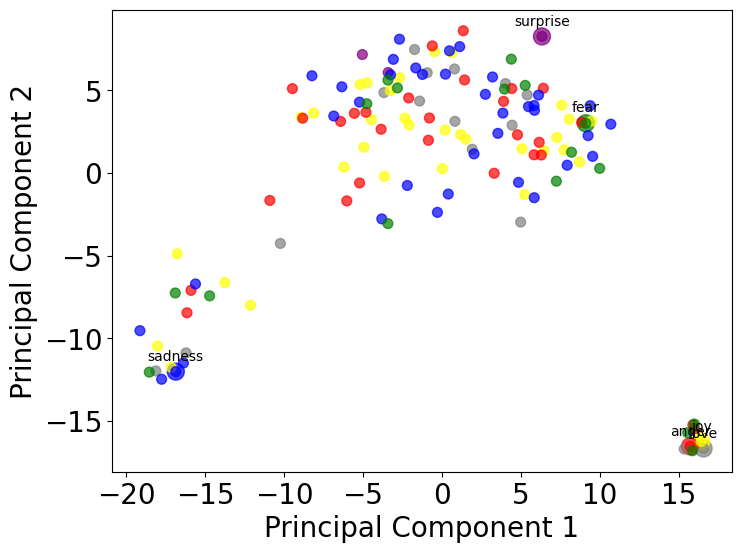

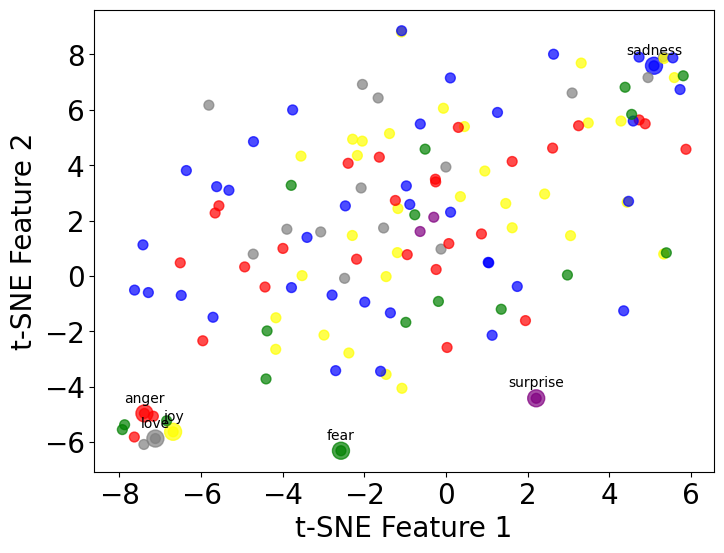

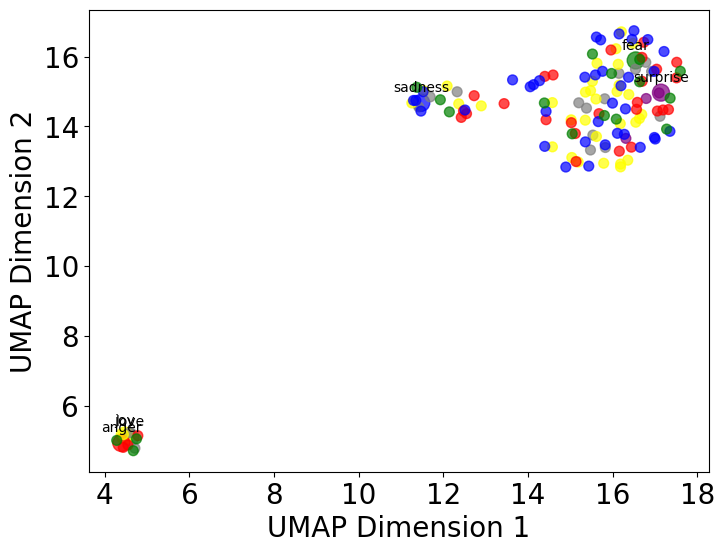

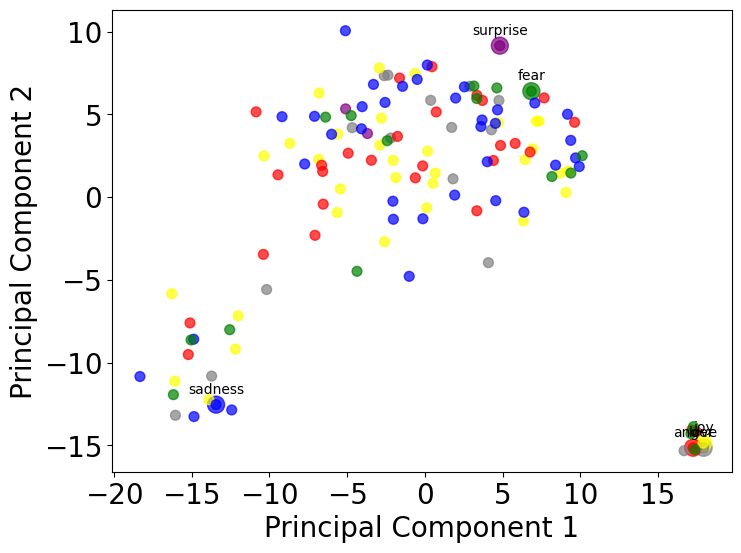

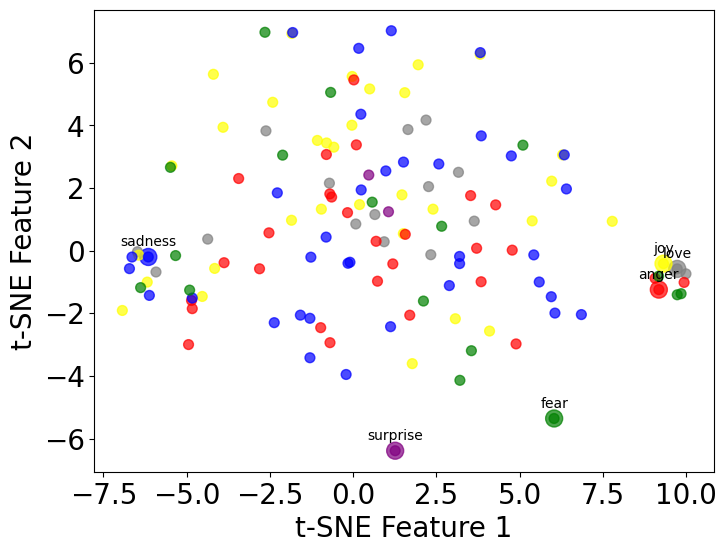

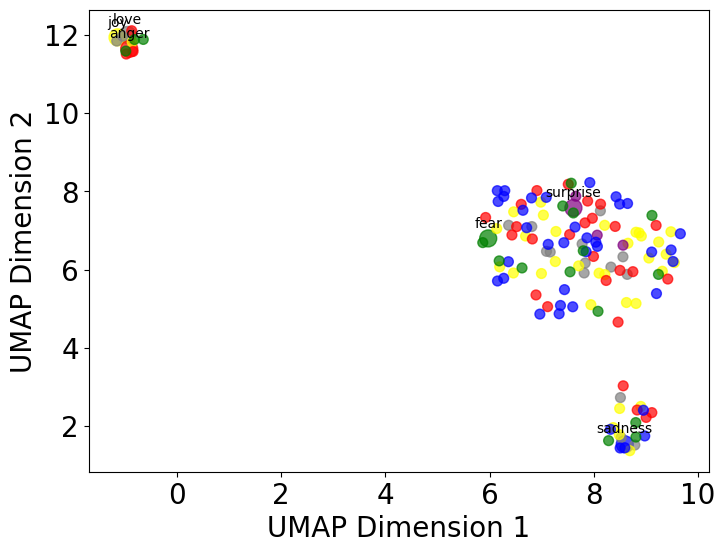

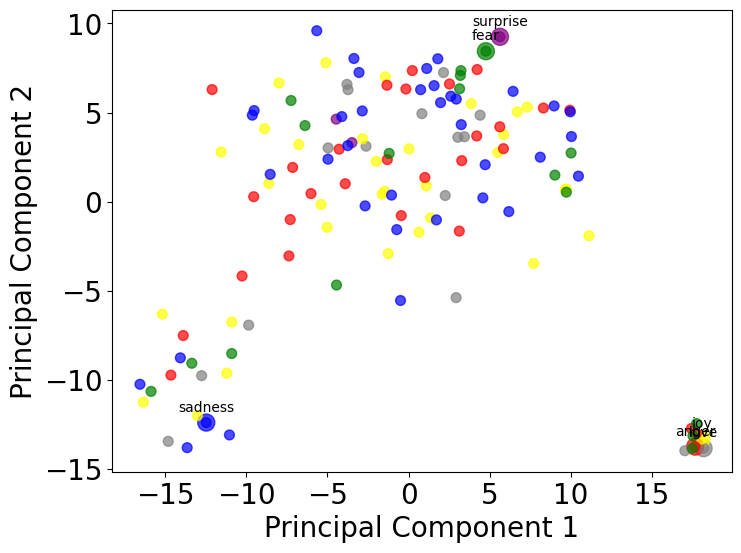

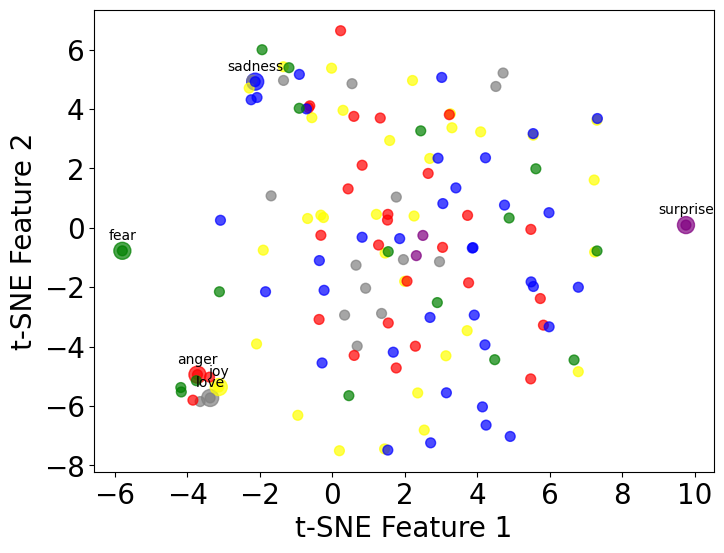

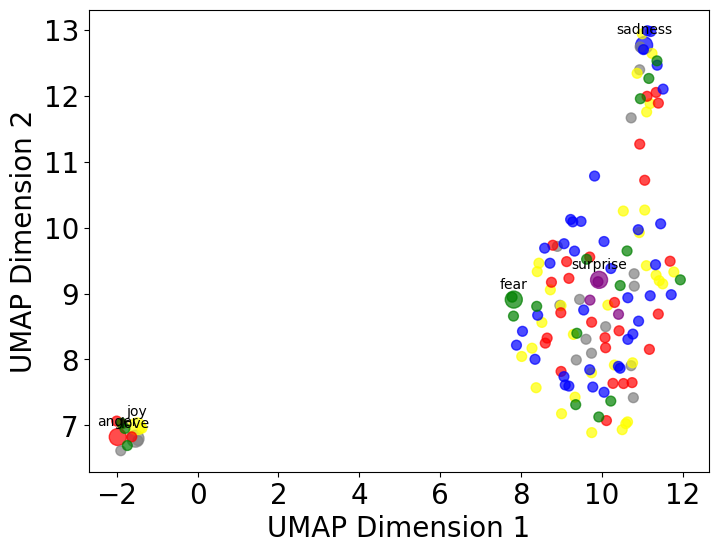

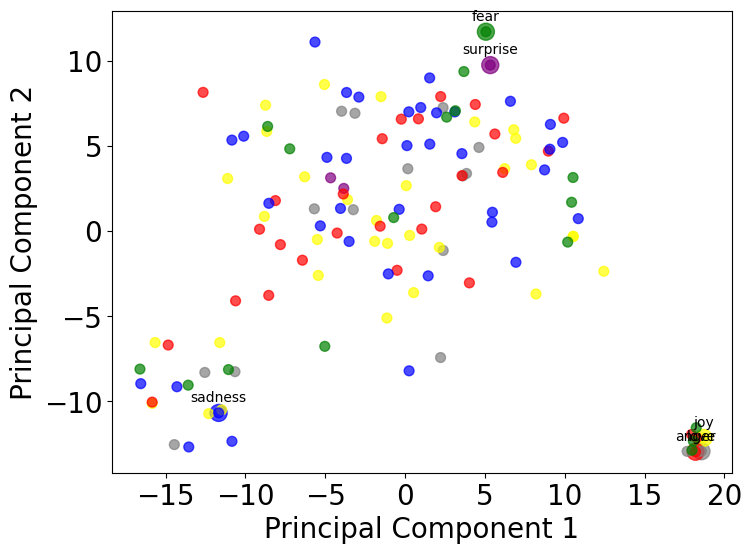

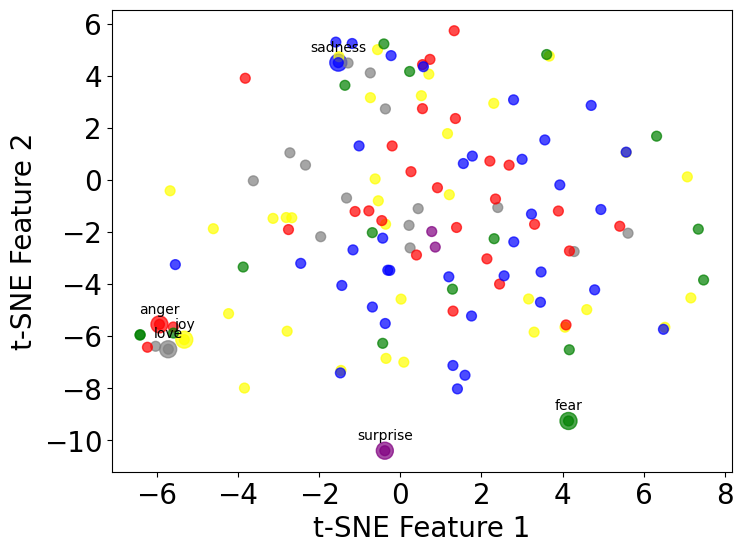

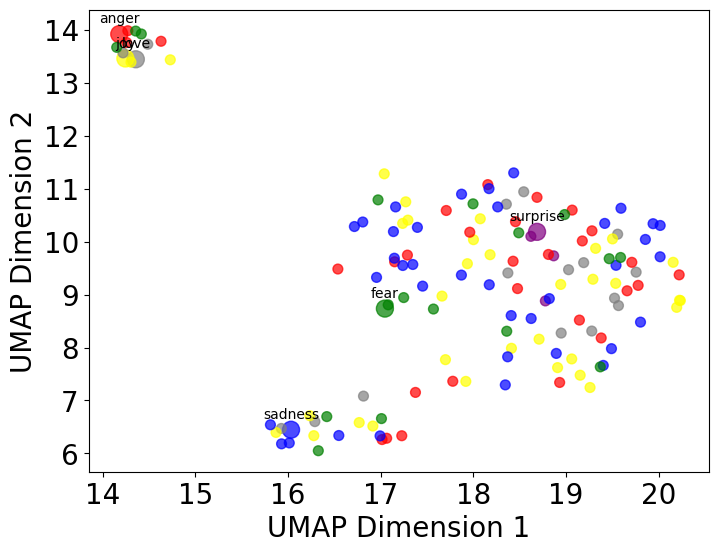

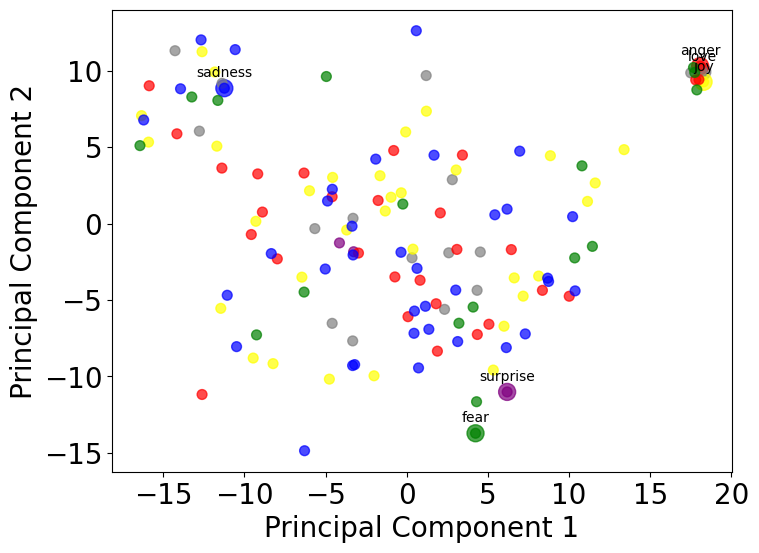

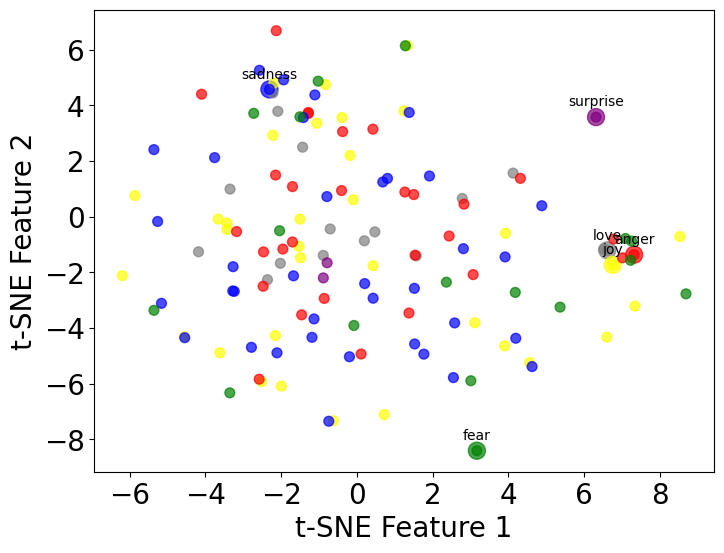

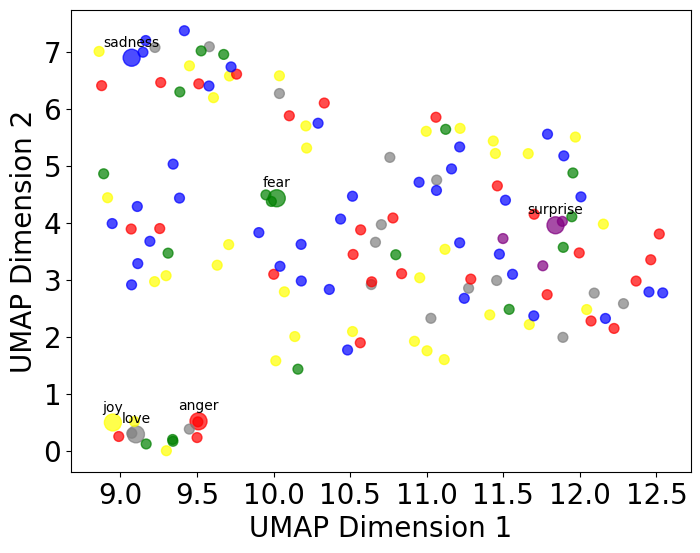

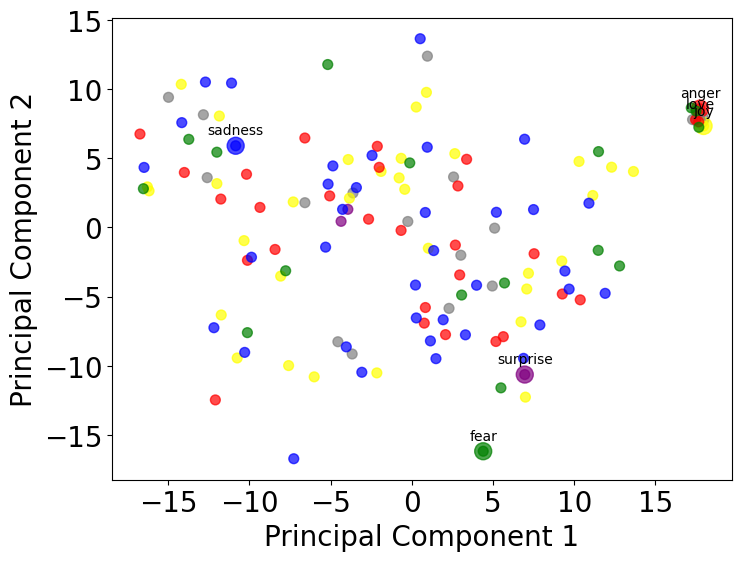

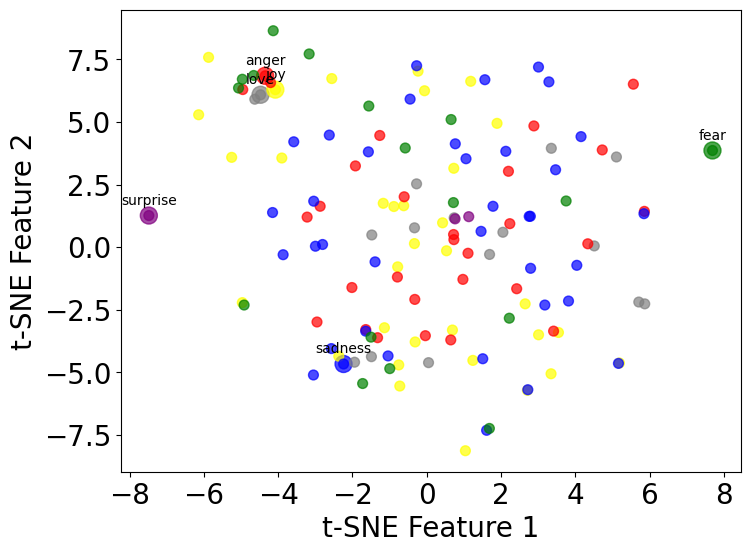

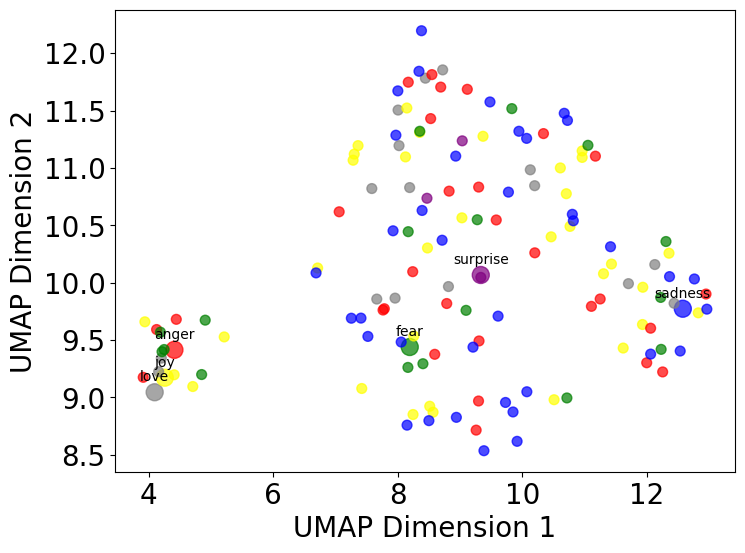

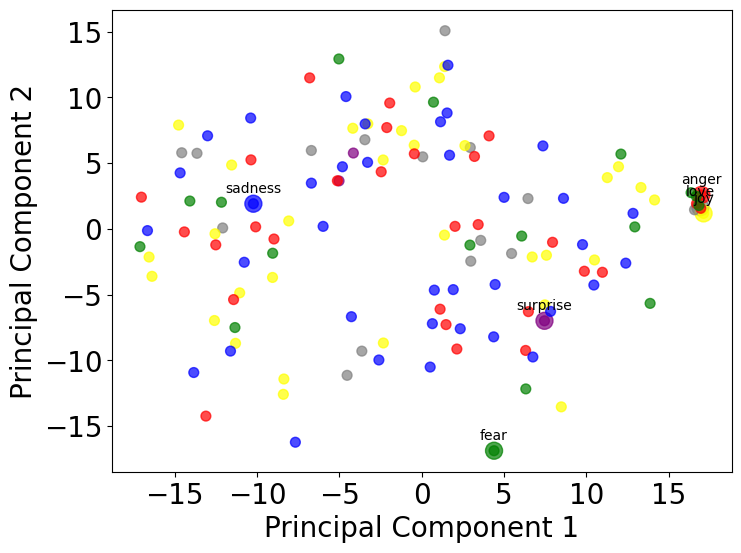

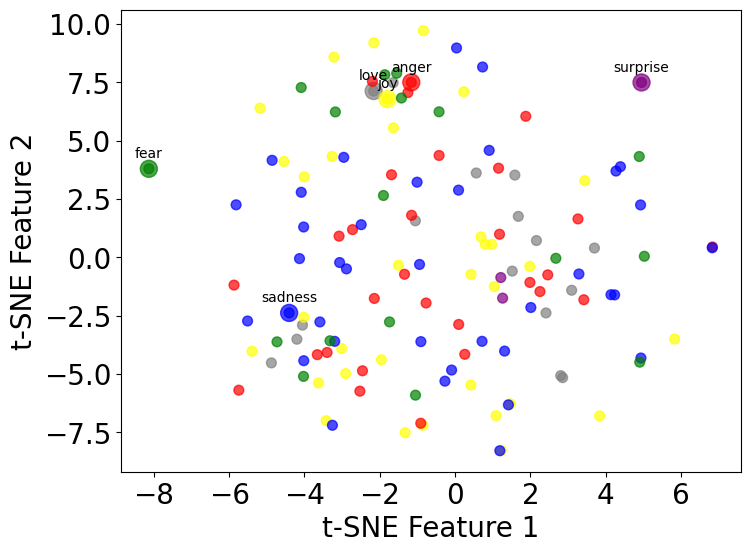

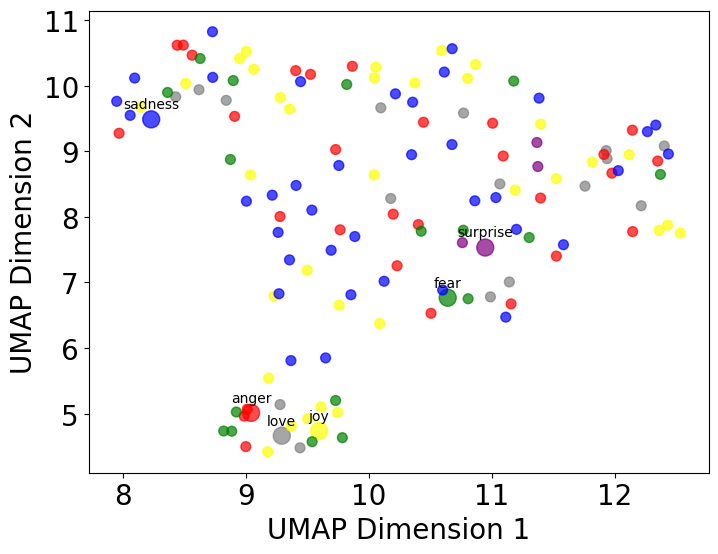

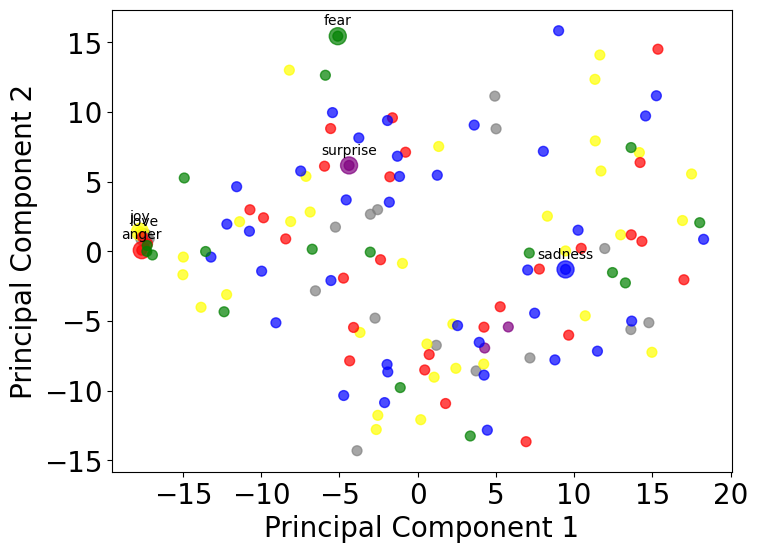

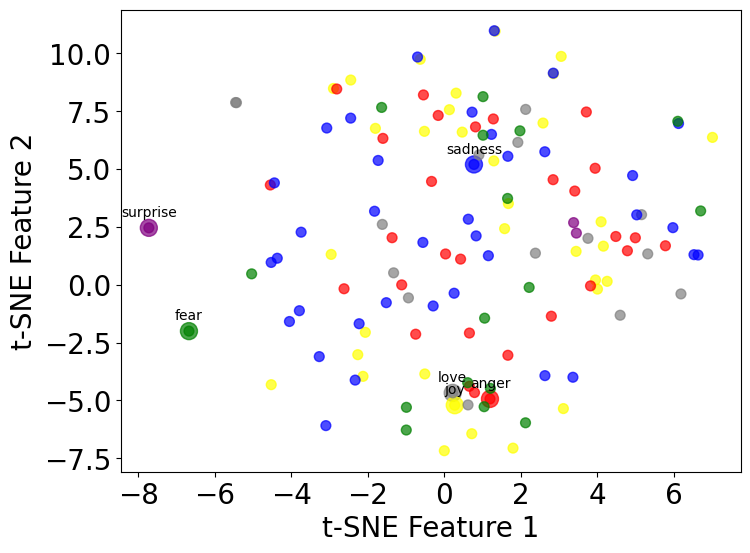

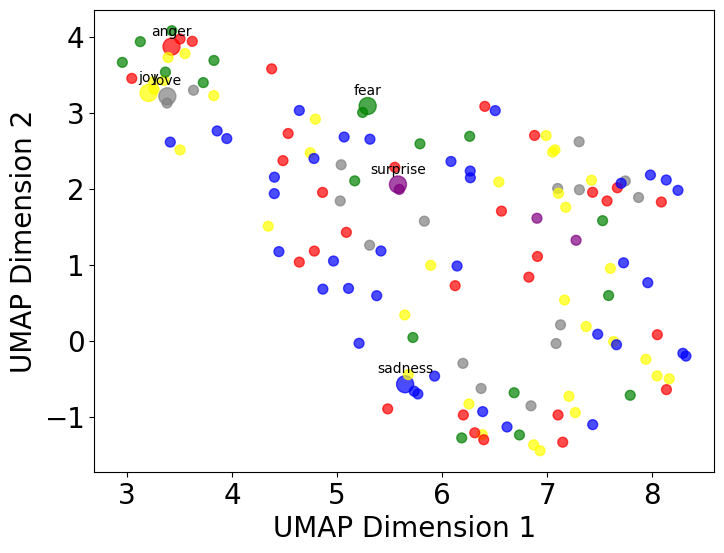

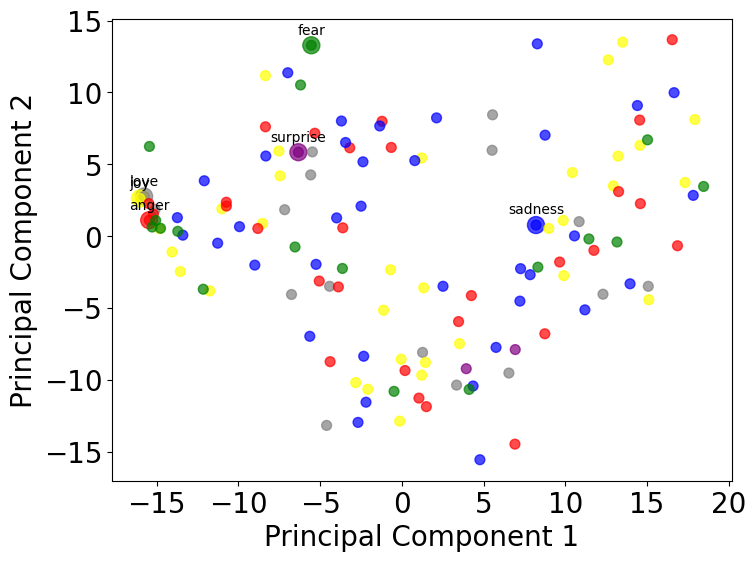

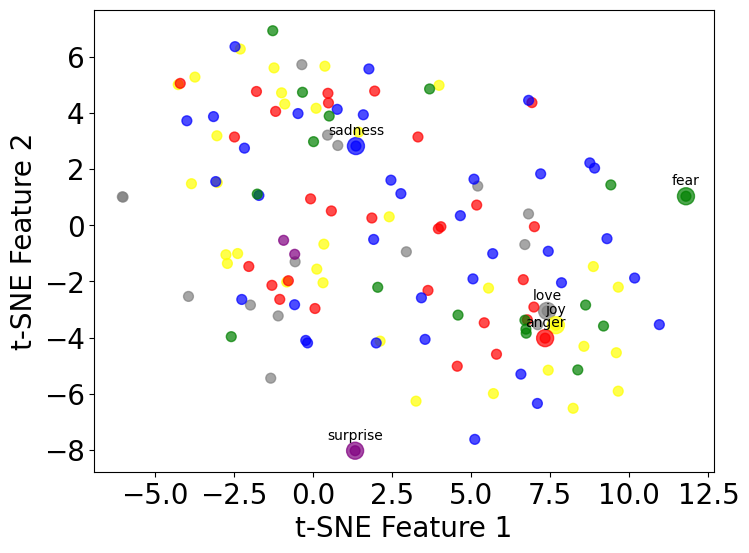

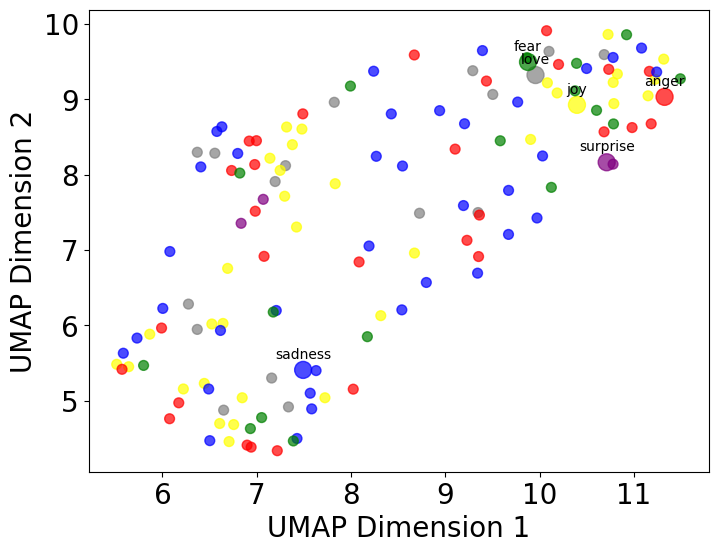

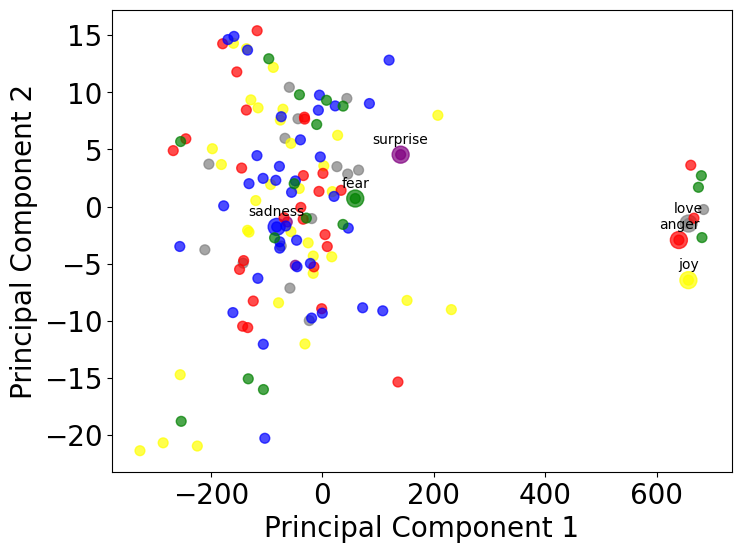

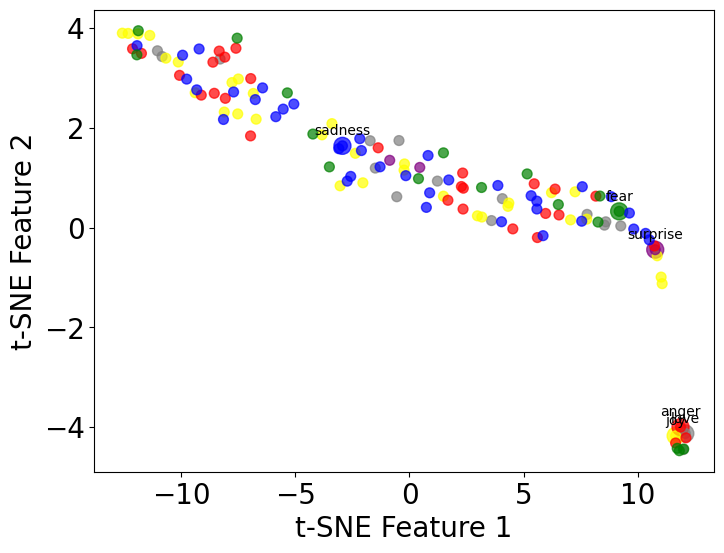

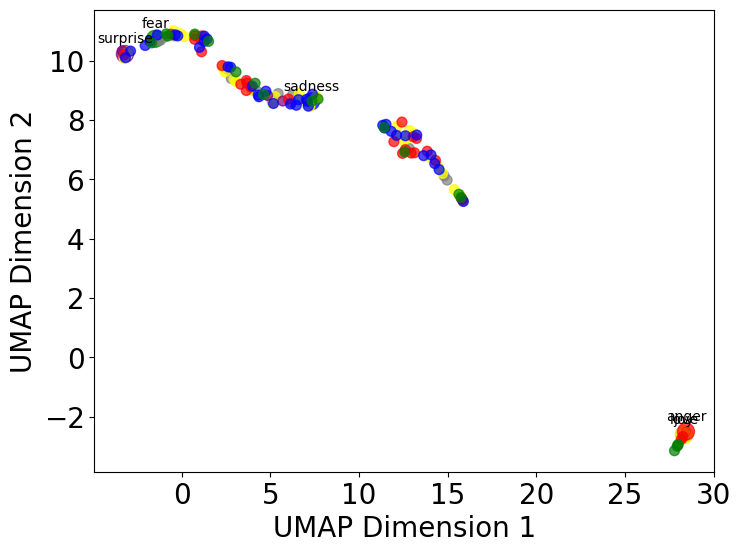

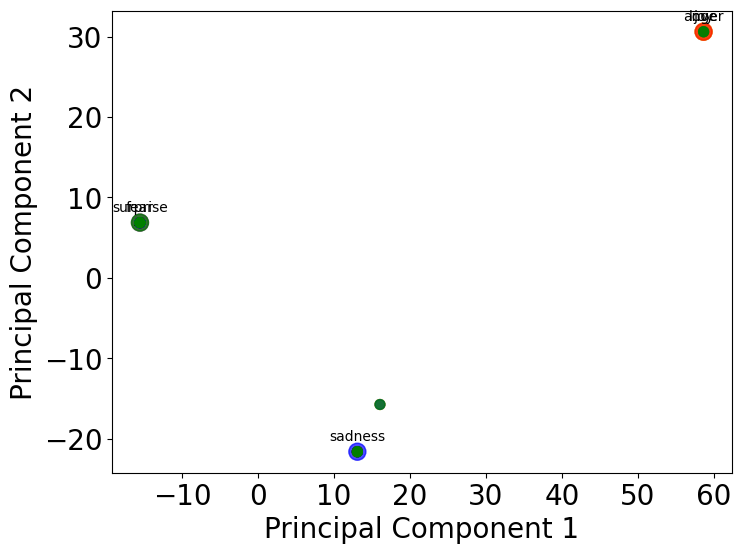

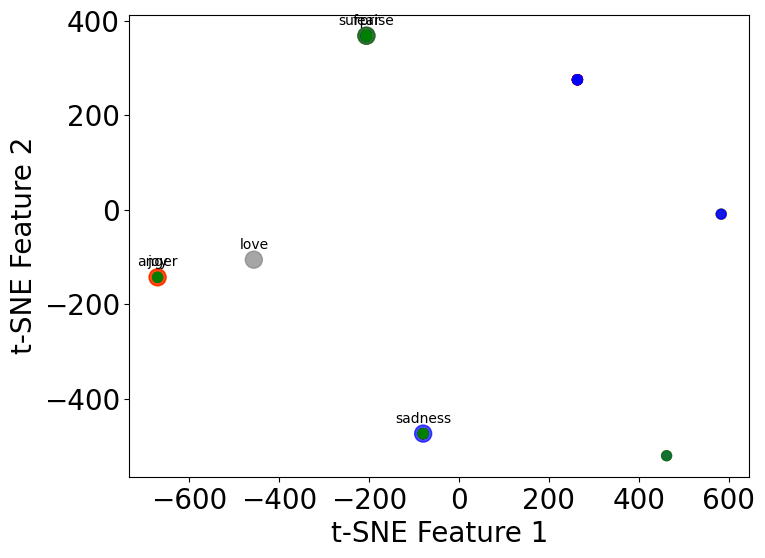

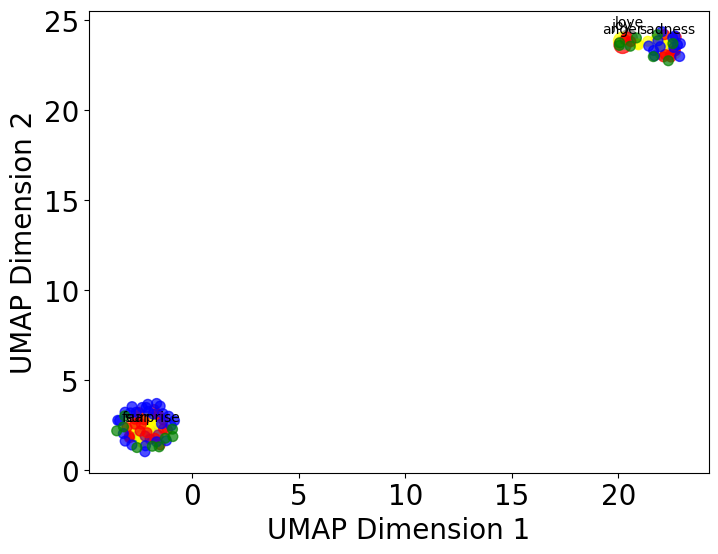

In [30]:
for i in range(12):
    logits_list = []
    for emotion in emotion_word_list:
        with model.trace(emotion) as runner:
            logits = model.transformer.h[i].output.save()
    
        logits_list.append(logits.value[0][:, -1, :]) 
    
    logits_list = torch.cat(tuple(logits_list), dim=0)
    print(logits_list.shape)
    plot_PCA('figures/dimension_reduction/gpt2_layer_{}_PCA.pdf'.format(i), logits_list, color_list, level_list, True)
    plot_tSNE('figures/dimension_reduction/gpt2_layer_{}_tSNE.pdf'.format(i), logits_list, color_list, level_list, True)
    plot_UMAP('figures/dimension_reduction/gpt2_layer_{}_UMAP.pdf'.format(i), logits_list, color_list, level_list, True)


logits_list = []
for emotion in emotion_word_list:
    with model.trace(emotion) as runner:
        logits = model.lm_head.output.save()
    logits_list.append(logits.value[:, -1, :]) 

logits_list = torch.cat(tuple(logits_list), dim=0)
print(logits_list.shape)
plot_PCA('figures/dimension_reduction/gpt2_lm_head_PCA.pdf'.format(i), logits_list, color_list, level_list, True)
plot_tSNE('figures/dimension_reduction/gpt2_lm_head_tSNE.pdf'.format(i), logits_list, color_list, level_list, True)
plot_UMAP('figures/dimension_reduction/gpt2_lm_head_UMAP.pdf'.format(i), logits_list, color_list, level_list, True)

logits_list = []
for emotion in emotion_word_list:
    with model.trace(emotion) as runner:
        logits = model.transformer.wpe.output.save()
    logits_list.append(logits.value[:, -1, :]) 

logits_list = torch.cat(tuple(logits_list), dim=0)
print(logits_list.shape)
plot_PCA('figures/dimension_reduction/gpt2_wpe_PCA.pdf'.format(i), logits_list, color_list, level_list, True)
plot_tSNE('figures/dimension_reduction/gpt2_wpe_tSNE.pdf'.format(i), logits_list, color_list, level_list, True)
plot_UMAP('figures/dimension_reduction/gpt2_wpe_UMAP.pdf'.format(i), logits_list, color_list, level_list, True)

    